In [4]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import pandas as pd
from datetime import datetime



# 폰트 설정
d2_path = './D2Coding-Ver1.3.2-20180524.ttf'

fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"] = "D2Coding"


# 파일 load 
file_path = './온라인쇼핑몰_판매매체별_상품군별거래액.csv'
ori = pd.read_csv(file_path, encoding="EUC-KR")  # utf-8

# 컬럼명 변경
ori.columns = ["category", "date", "internet", "mobile"]

ori.head()


,category,date,internet,mobile
0,컴퓨터 및 주변기기,2017.01,288391,133993
1,컴퓨터 및 주변기기,2017.02,329143,146200
2,컴퓨터 및 주변기기,2017.03,322089,151262
3,컴퓨터 및 주변기기,2017.04,251604,116675
4,컴퓨터 및 주변기기,2017.05,241871,109053


In [8]:
ori.tail()

# date 컬럼의 데이터 전처리
ori['date'] = ori['date'].map(lambda x:x.rstrip(' p)'))
ori['date'] = pd.to_datetime(ori["date"], format='%Y.%m')

ori.tail()

,category,date,internet,mobile
2203,기타,2024-08-01,61304,120200
2204,기타,2024-09-01,63863,126583
2205,기타,2024-10-01,68403,128216
2206,기타,2024-11-01,73246,135527
2207,기타,2024-12-01,75613,144134


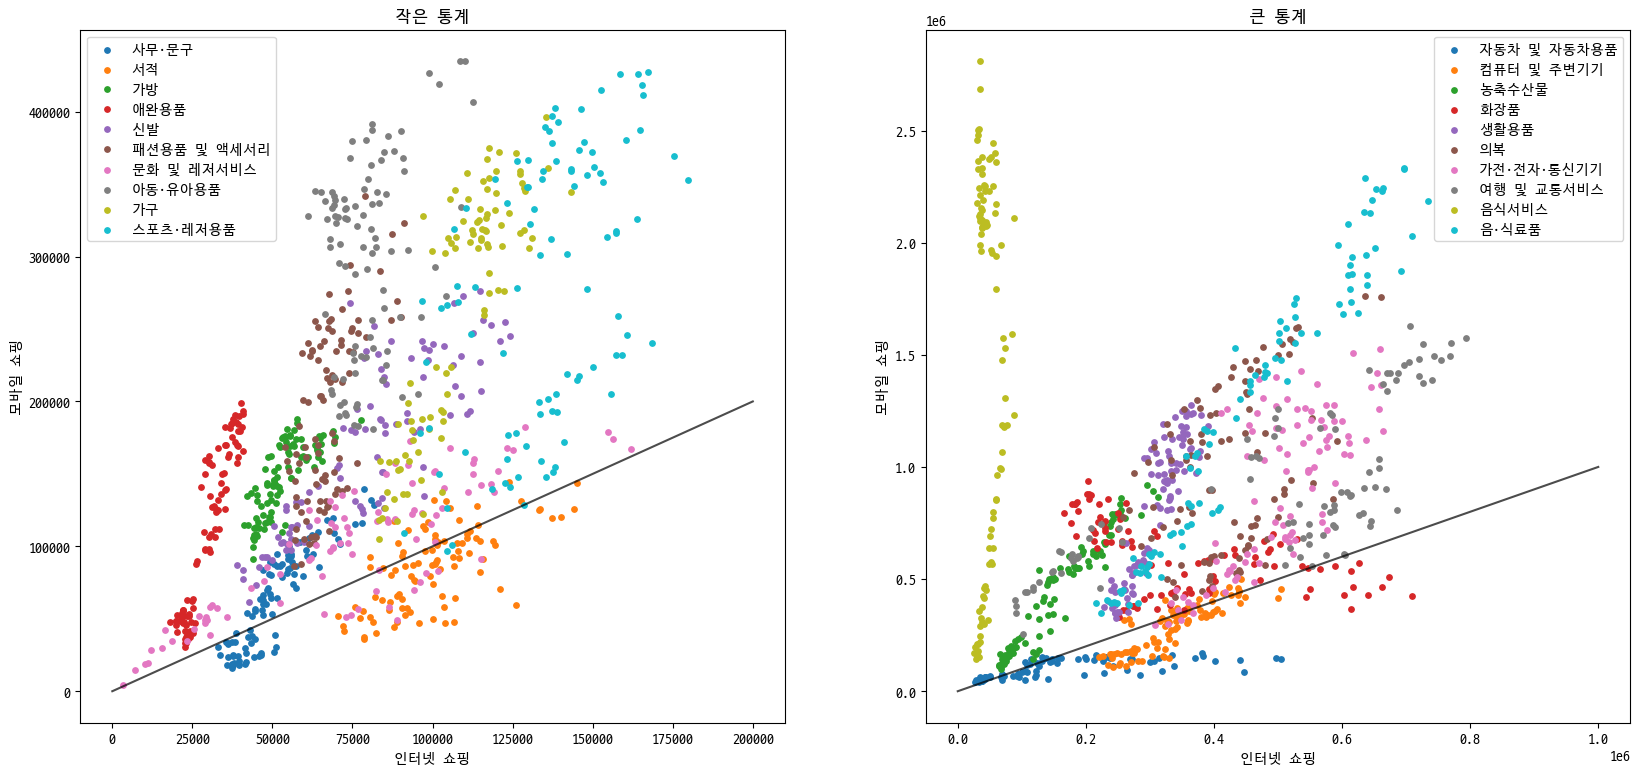

In [25]:
ex1_data = ori.copy()
ex2_data = ori.copy()
ex3_data = ori.copy()

obj_1 = ['사무·문구', '서적', '가방', '애완용품', '신발', '패션용품 및 액세서리', '문화 및 레저서비스', '아동·유아용품', '가구', '스포츠·레저용품']#, '자동차 및 자동차용품']
obj_2 = ['자동차 및 자동차용품', '컴퓨터 및 주변기기', '농축수산물', '화장품', '생활용품', '의복', '가전·전자·통신기기', '여행 및 교통서비스', '음식서비스', '음·식료품']
# , '이쿠폰서비스'
obj_total = ['사무·문구', '서적', '가방', '애완용품', '신발', '패션용품 및 액세서리', '문화 및 레저서비스', '아동·유아용품', '가구', '스포츠·레저용품', '자동차 및 자동차용품',
             '컴퓨터 및 주변기기', '이쿠폰서비스', '농축수산물', '화장품', '생활용품', '의복', '가전·전자·통신기기', '여행 및 교통서비스', '음식서비스', '음·식료품']


ex1_data = ex1_data[ex1_data['category'].isin(obj_1)] 
ex2_data = ex2_data[ex2_data['category'].isin(obj_2)]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,9))

category_1 = obj_1
category_2 = obj_2


for cate_1 in category_1:
    category_data_1 = ex1_data[ex1_data['category'] == cate_1]
    x_data_1 = category_data_1['internet']
    y_data_1 = category_data_1['mobile']
    ax1.scatter(x_data_1, y_data_1, s = 15, label = cate_1)

for cate_2 in category_2:
    category_data_2 = ex2_data[ex2_data['category'] == cate_2]
    x_data_2 = category_data_2['internet']
    y_data_2 = category_data_2['mobile']
    ax2.scatter(x_data_2, y_data_2, s = 15, label = cate_2)



ax1.set_xlabel('인터넷 쇼핑')
ax1.set_ylabel('모바일 쇼핑')

ax2.set_xlabel('인터넷 쇼핑')
ax2.set_ylabel('모바일 쇼핑')

ax1.legend(loc='best')
ax1.plot([0, 200000], [0, 200000], 'k-', alpha=0.7)
ax1.set_title('작은 통계')


ax2.legend(loc='best')
ax2.plot([0, 1000000], [0, 1000000], 'k-', alpha=0.7)
ax2.set_title('큰 통계')

plt.show()


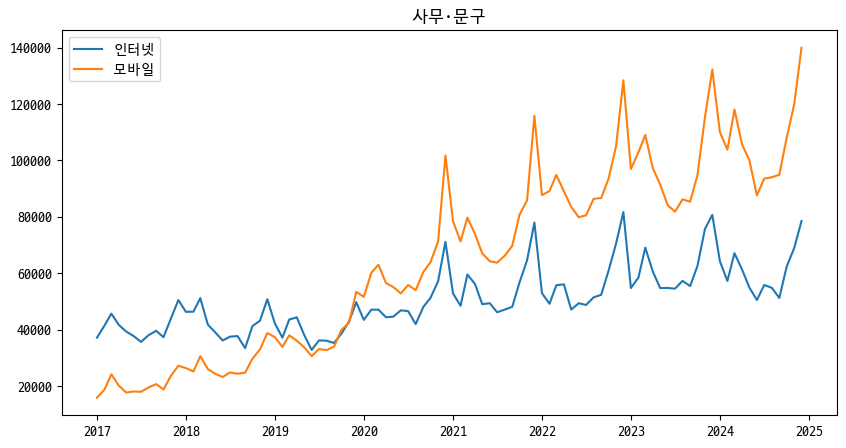

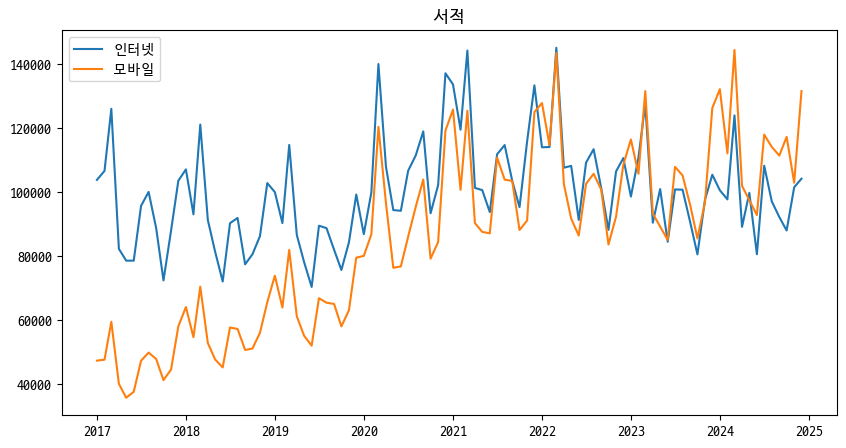

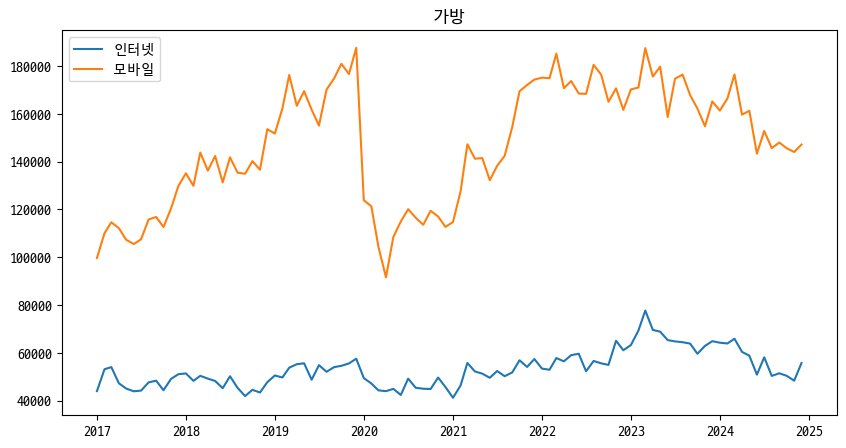

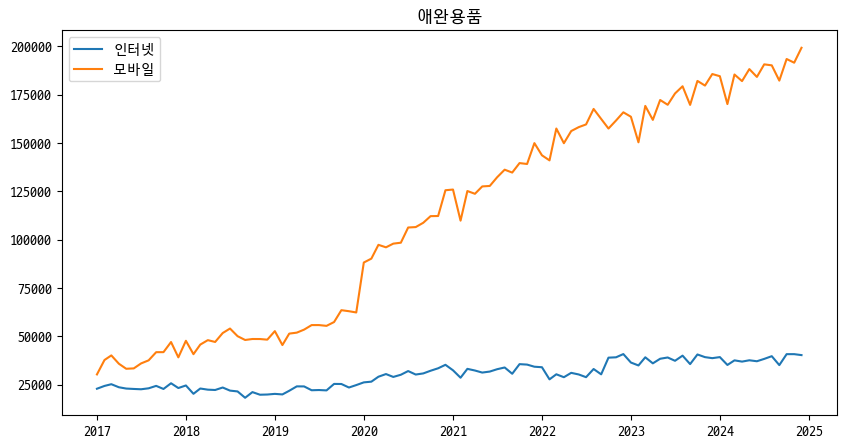

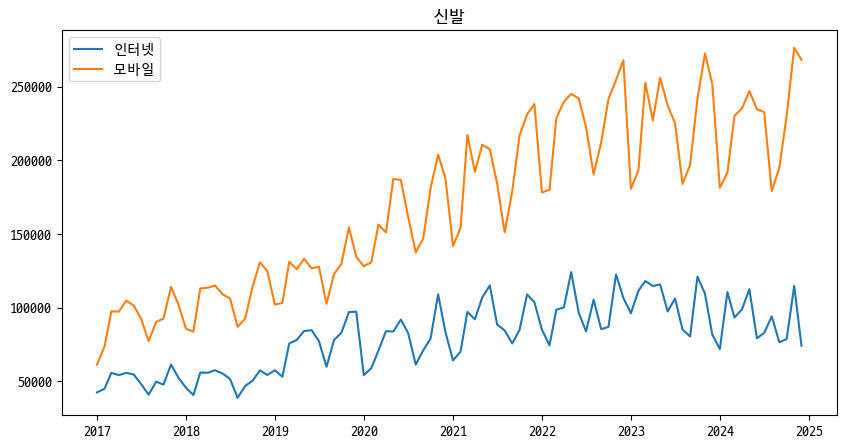

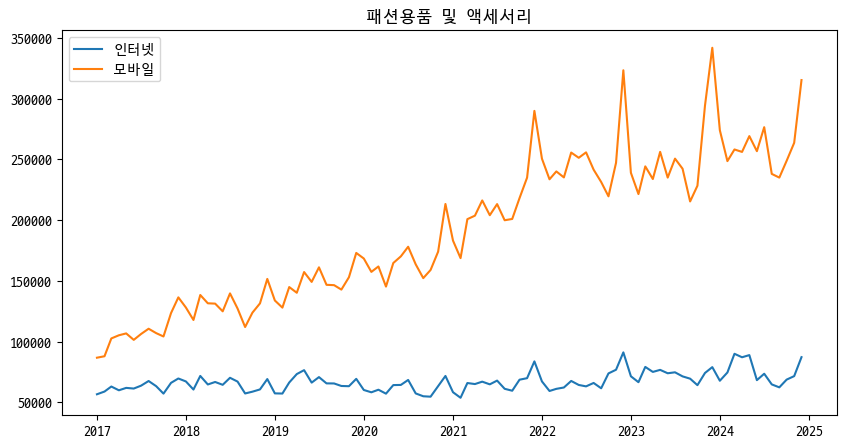

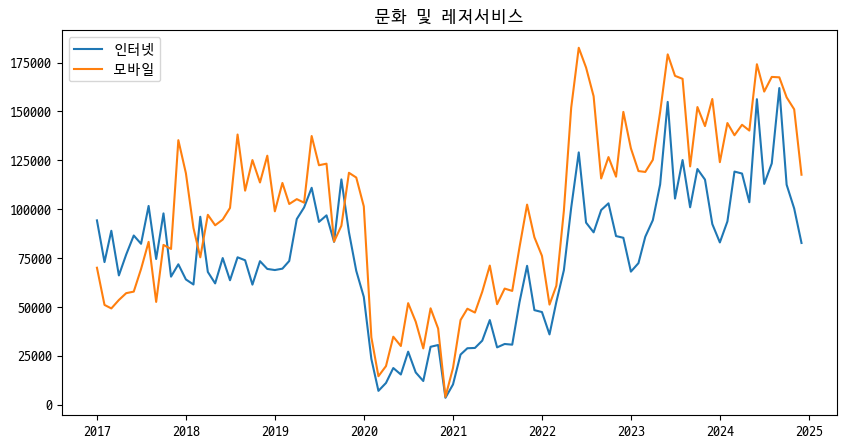

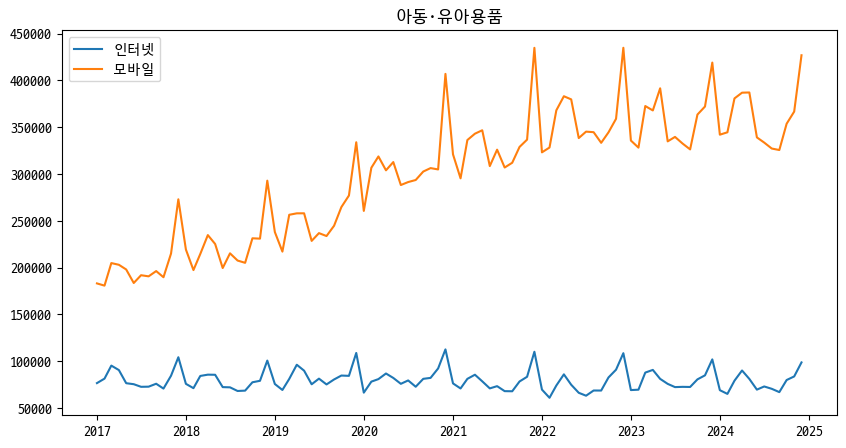

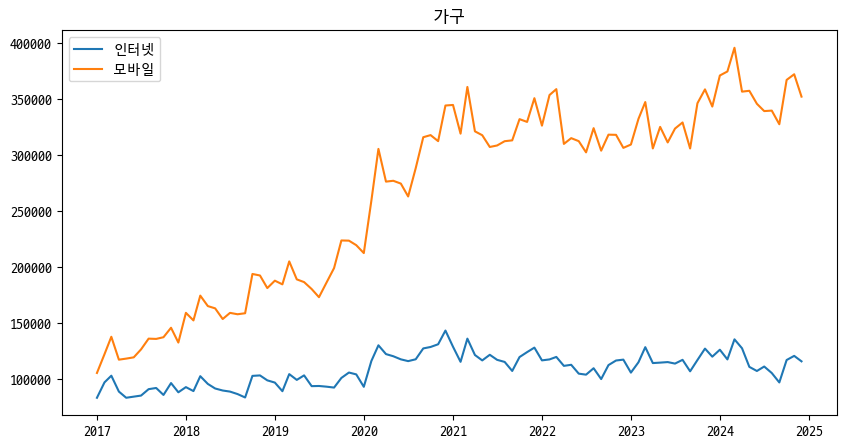

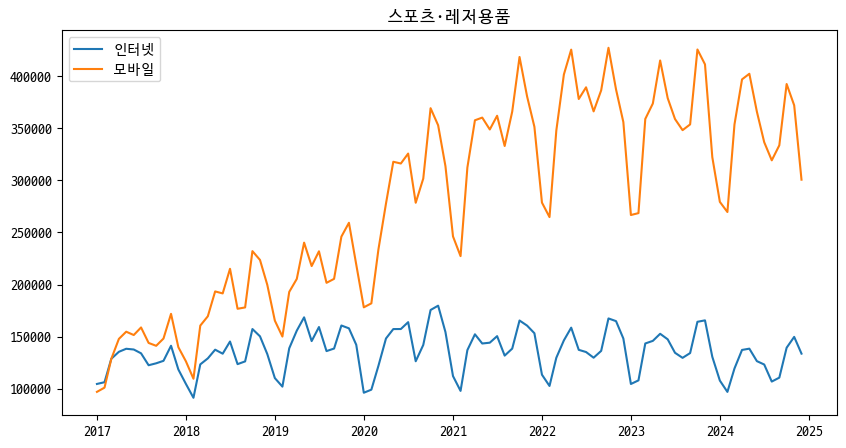

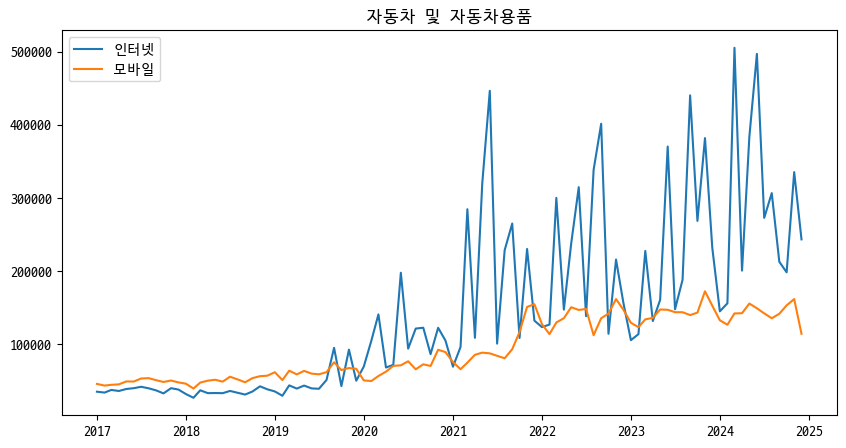

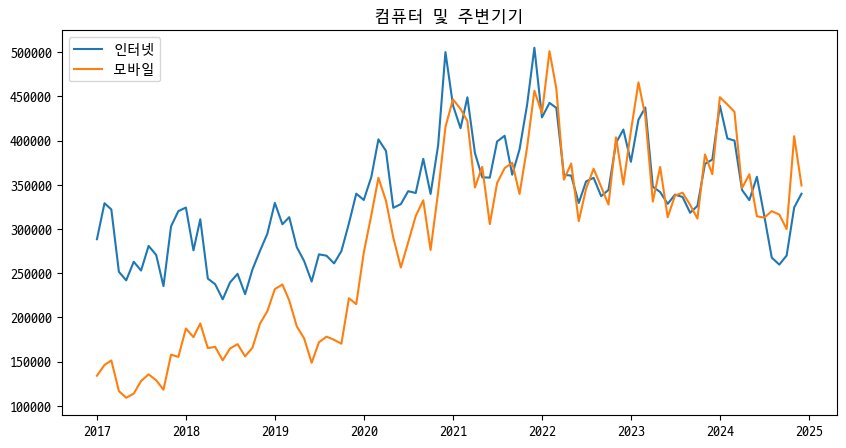

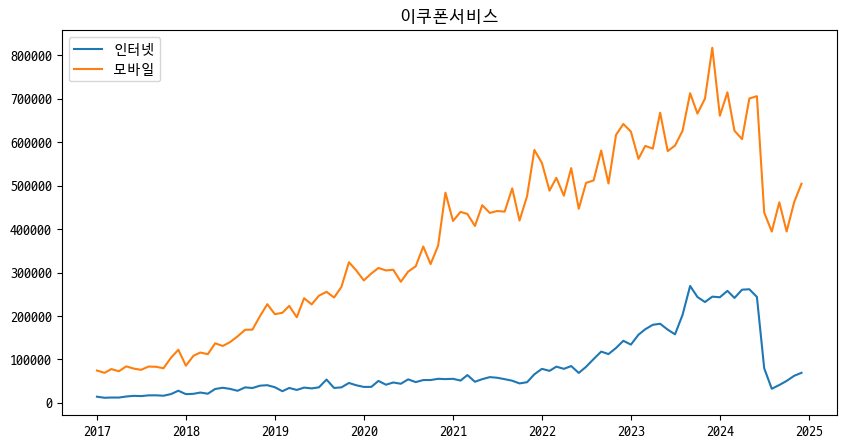

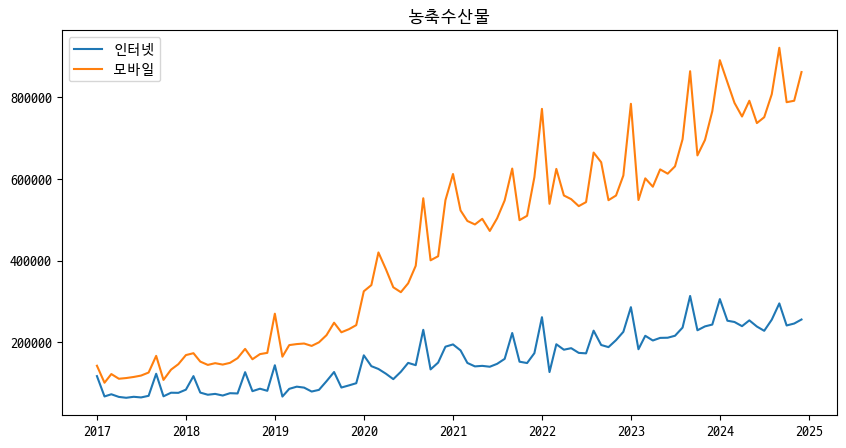

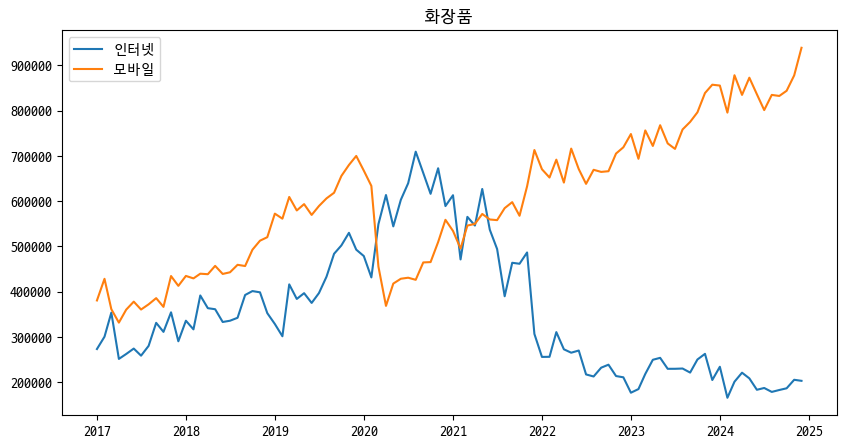

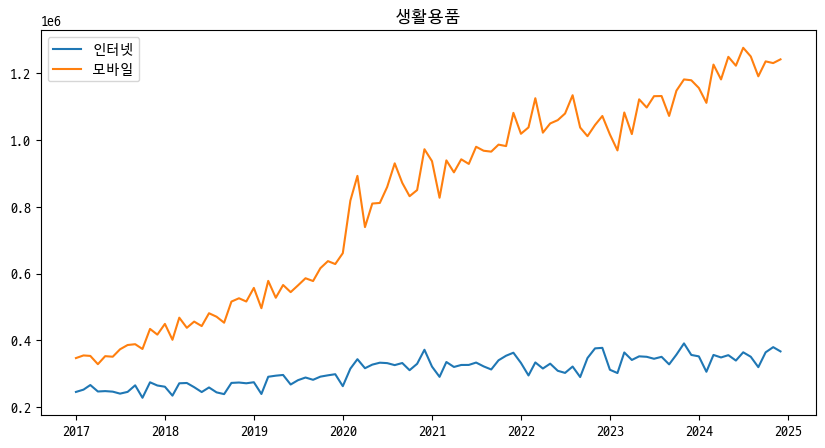

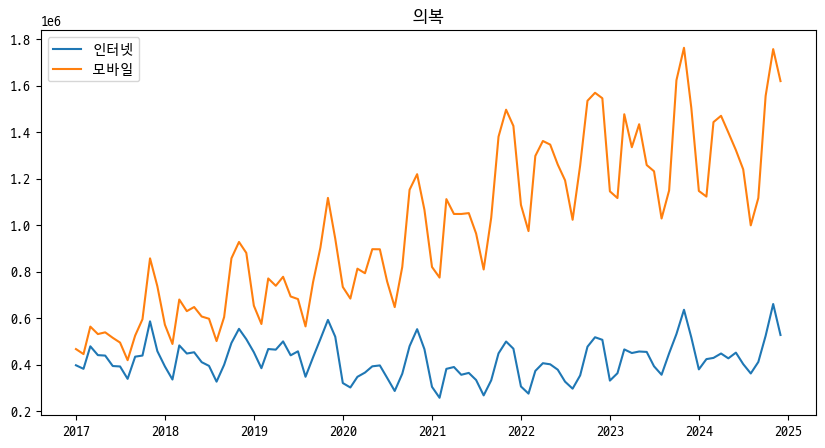

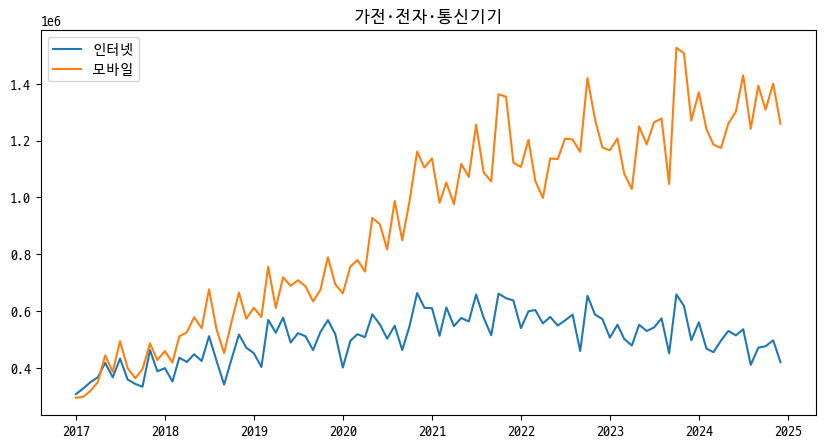

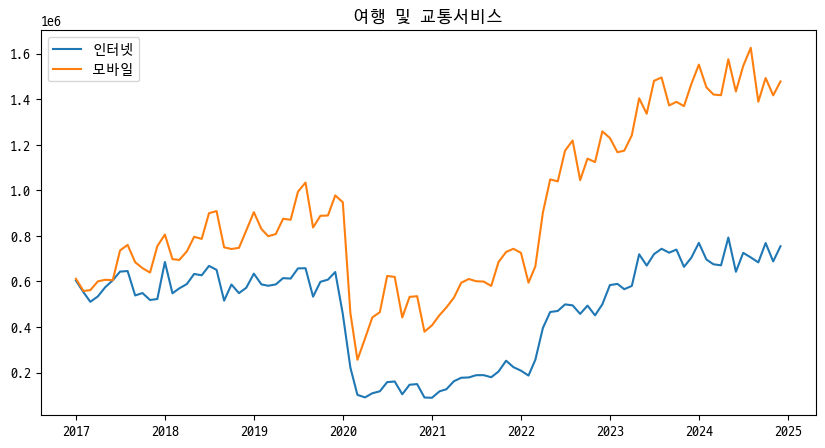

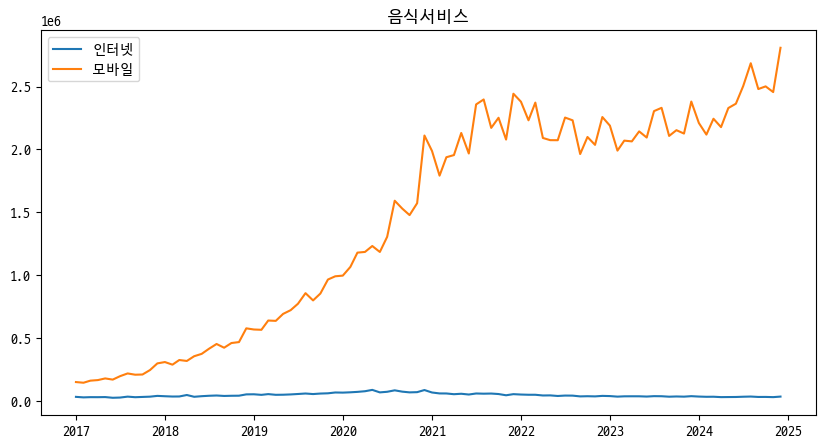

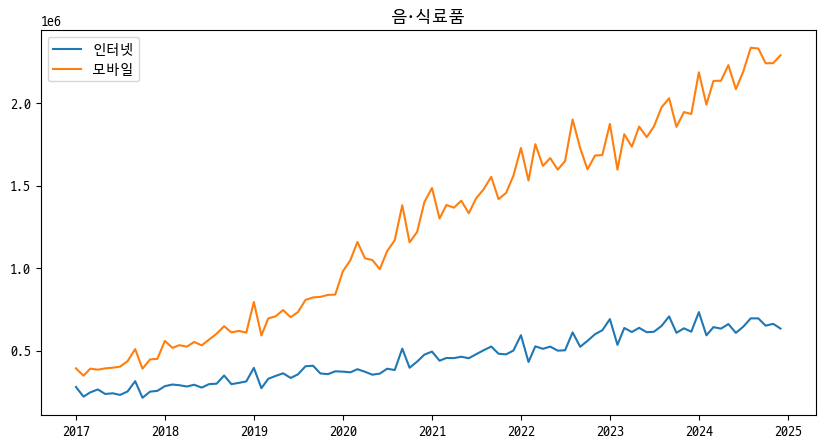

In [31]:

for ct in obj_total:
    ct_data = ex3_data[ex3_data['category'] == ct]
    plt.figure(figsize=(10,5))
    x = ct_data.date
    y1 = ct_data.internet
    y2 = ct_data.mobile
    plt.plot(x, y1, label = '인터넷')
    plt.plot(x, y2, label = '모바일')
    plt.title(ct)
    plt.legend(loc='upper left')
    plt.show()



- 몇몇 항목을 제외하면 보통 모바일 거래가 더 많다
- [서적, 문화 및 레저서비스, 컴퓨터 및 주변기기]는 인터넷과 모바일의 거래액이 비슷하다
- [서적, 문화 및 레저서비스, 컴퓨터 및 주변기기, 자동차 및 자동차용품]을 제외한 항목들은 시간이 지날수록 모바일 거래가 늘어나고있다.
- [사무 · 문구]는 연말에 거래량이 가장 높아지고 신학기 시즌에 다시 높아지는 양상을 보인다.
- [서적]은 연말, 연초에 거래량이 가장 높다
- [가방]은 모바일 거래량이 월등하게 많고, 코로나 시기 거래량이 급 감소한 모습이 보인다. 또한 최근들어 거래가 감소하는 모습이 보인다.
- [애완용품, 가구]는 모바일 거래량이 월등하게 많고, 코로나 시기를 기점으로 거래량이 급증했으며 이후 해마다 높아지는 모습을 보인다.
- [신발]은 모바일 거래량이 좀 더 많지만 서로 비슷한 양상을 보인다.
- [패션용품 및 액세서리, 아동 · 유아용품, 생활용품, 음 · 식료품]은 모바일 거래량이 월등하게 많고, 매해 모바일 거래량이 높아지고 있다.
- [문화 및 레저서비스, 여행 및 교통서비스]는 코로나 시기 거래량이 대폭 감소했으나, 코로나 상황이 완화된 이후 전보다 더 높은 거래량으로 회복된 모습을 보인다.
- [스포츠 · 레저용품]은 2020년 이후 모바일 거래량이 폭발적으로 늘어나고 있으며, 겨울철 거래량이 뚝 떨어지는 모습을 보인다.
- [자동차 및 자동차용품]은 인터넷 거래 규모가 모바일 보다 높으며, 거래량이 들쑥날쑥하는 특이한 모습을 보인다.
- [컴퓨터 및 주변기기는] 2020년을 기점으로 거래 규모가 커졌다가 최근 감소세를 띈다.
- [이쿠폰서비스는] 모바일 거래액이 점점 늘어나다, 24년 하반기 급락하는 모습이 보인다.
- [농축순산물, 의복, 가전 · 전자 · 통신기기]은 모바일 거래액이 계속해서 증가하고있다.
- [화장품]은 2020년 모바일과 인터넷 거래액의 역전이 일어났으나 2022년 인터넷 거래액이 급감하면서 상당한 차이가 나타나고있다.
- [음식서비스]는 인터넷 거래액이 모바일에 비해 매우 낮은편이며 변화가 거의없다. 반면 모바일 거래액은 2021년 까지 급증했으며 이후에도 증가하는 모습을 보인다.